# Learning a complicated function with a simple neural network

The purpose of this notebook is to implement a deep neural network using Keras to learn a complicated function (function interpolation)

In [13]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers
from platform import python_version

print(python_version())

3.8.10


In [14]:
import tensorflow as tf
tf.version.VERSION

'2.3.0'

### Generation of data using a complecated funciton

In [15]:
def some_complicated_function(x):  # definition of a complecated funciton
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

##### Simulation of train data

In [16]:
N_train = 10 ** 4  # number of training samples
# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + np.random.randn(xtrain.shape[0])  # train data includes some noise

In [17]:
print("xtrain.shape", xtrain.shape)
print("ytrain.shape", ytrain.shape)

xtrain.shape (10000, 1)
ytrain.shape (10000, 10000)


##### Simulation of test data

In [6]:
N_test = 10000  # number of testing samples
xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [7]:
print("xtest.shape", xtest.shape)
print("ytest.shape", ytest.shape)

xtest.shape (10000,)
ytest.shape (10000,)


##### Plot of the function we want to interpolate

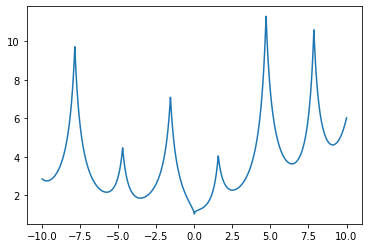

In [8]:
plt.plot(xtest, ytest)

### Model definition

**TASK 1**: In the code below try to set values for relevant hyperparameters, such as the number of nodes, the number of layers, and choose an activation function. Also, using the module **keras.regularizers** try to set parameter norm penalties or add a dropout layer via **layers.Dropout(fraction)** for regularizing your model.

In [22]:
xtrain.shape[1]

1

In [18]:
nb_nodes = 50
nb_layers = 4
activation = "relu"
reg_strategy = keras.regularizers.l1_l2(l1=0.01, l2=0.01)  # use L1 and L2 regularization

model = keras.models.Sequential(name="1Dfit")
model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy,
                       input_dim=xtrain.shape[1]))

for i in range(nb_layers - 1):
    model.add(layers.Dense(nb_nodes, activation=activation, kernel_regularizer=reg_strategy))

model.add(layers.Dense(1))

print(model.summary())

Model: "1Dfit"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

**TASK 2**: Complete the code below by choosing an objective (loss) function for this regression task and optimization method from **keras.optimizers**

In [19]:
adam = keras.optimizers.Adam(lr=0.001)  # learning rate = 0.001
model.compile(loss="MeanSquaredError", optimizer=adam)

### Train the model

**TASK 3**: Complete the code below and train the network for a couple of epochs and save the model several times in between

In [20]:
epochs = 100
save_period = 20  # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-{epoch:02d}.hdf5", save_weights_only=True, save_freq=save_period)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Epoch 1/100
157/157 [==============================] - 1s 4ms/step - loss: 12.5478
Epoch 2/100
157/157 [==============================] - 1s 4ms/step - loss: 7.8241
Epoch 3/100
157/157 [==============================] - 1s 4ms/step - loss: 6.5058
Epoch 4/100
157/157 [==============================] - 1s 3ms/step - loss: 5.7546
Epoch 5/100
157/157 [==============================] - 1s 3ms/step - loss: 5.2154
Epoch 6/100
157/157 [==============================] - 1s 3ms/step - loss: 4.8531
Epoch 7/100
157/157 [==============================] - 1s 3ms/step - loss: 4.5963
Epoch 8/100
157/157 [==============================] - 1s 3ms/step - loss: 4.4149
Epoch 9/100
157/157 [==============================] - 1s 3ms/step - loss: 4.2810
Epoch 10/100
157/157 [==============================] - 1s 3ms/step - loss: 4.1852
Epoch 11/100
157/157 [==============================] - 1s 4ms/step - loss: 4.1100
Epoch 12/100
157/157 [==============================] - 1s 3ms/step - loss: 4.0573
Epoch 13/100

157/157 [==============================] - 1s 3ms/step - loss: 2.8965
Epoch 100/100
157/157 [==============================] - 1s 3ms/step - loss: 2.8865


Compare the performance of the model during the training. You may use the skeleton below:

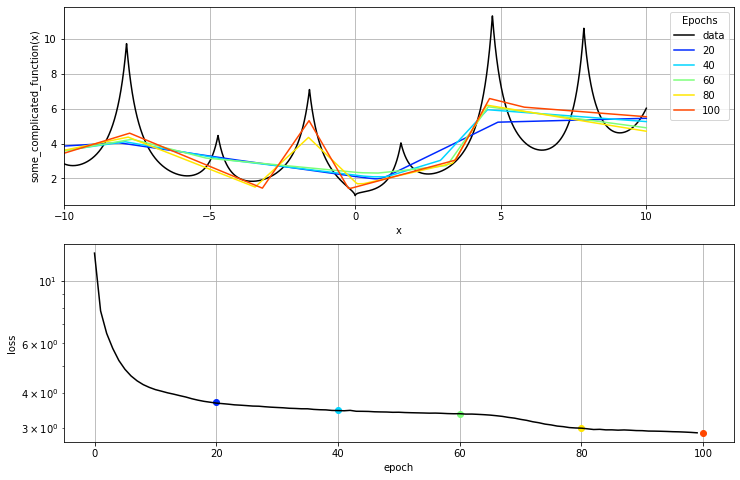

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.hdf5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()